# Fuzzy logic introduction
## Installation: 
* pip install -U scikit-fuzzy
* pip install networkx==1.3
    * networkx==2.0 has drastical changes in the code

## Tasks:
* Make the tip recommendation system more interactive with annotator
* Make more fine grained levels, i.e. (bad,descent,great) -> (poor,bad,average,descent,great) and add rules for them
* Add new Antecednets variable: interior, quota and add rules for them


# The Tipping Problem
Taking the tipping example full circle, if we were to create a controller which estimates the tip we should give at a restaurant, we might structure it as such:

## Antecednets (Inputs)
* service
    * Universe (ie, crisp value range): How good was the service of the waitress, on a scale of 1 to 10?
    * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
* food quality
    * Universe: How tasty was the food, on a scale of 1 to 10?
    * Fuzzy set: bad, decent, great

## Consequents (Outputs)
* tip
    * Universe: How much should we tip, on a scale of 0% to 25%
    * Fuzzy set: low, medium, high
* Rules
    * IF the service was good or the food quality was good, THEN the tip will be high.
    * IF the service was average, THEN the tip will be medium.
    * IF the service was poor and the food quality was poor THEN the tip will be low.
* Usage
    * If I tell this controller that I rated:
        * the service as 9.8, and
        * the quality as 6.5,
    * it would recommend I leave:
        * a 20.2% tip.

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip     = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

interior = ctrl.Antecedent(np.arange(0, 11, 1), 'interior')
quota = ctrl.Antecedent(np.arange(0, 11, 1), 'quota')


# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)
interior.automf(3)
quota.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['poor'] = fuzz.trimf(tip.universe,    [0, 0, 8])
tip['bad'] = fuzz.trimf(tip.universe,     [0, 8, 14])
tip['average'] = fuzz.trimf(tip.universe, [8, 14, 22])
tip['descent'] = fuzz.trimf(tip.universe, [16, 20, 25])
tip['great'] = fuzz.trimf(tip.universe, [20, 25, 25])




/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


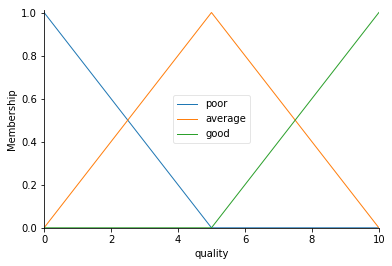

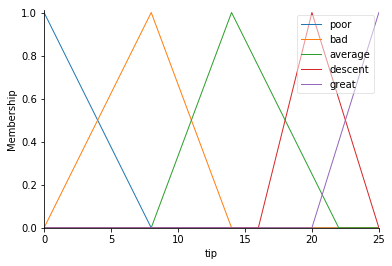

In [9]:
# You can see how these look with .view()
%matplotlib inline
quality.view()
tip.view()

In [10]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['poor'])
rule2 = ctrl.Rule(service['average'], tip['average'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['great'])
rule4 = ctrl.Rule(quota['average'] | quality['good'], tip['great'])
rule5 = ctrl.Rule(quota['good'] | interior['good'], tip['great'])
rule6 = ctrl.Rule(quality['good'] | interior['poor'], tip['average'])
rule7 = ctrl.Rule(service['average'] | quota['average'], tip['descent'])

In [11]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,rule6,rule7])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [12]:
from ipywidgets import interact_manual

@interact_manual
def get_input(interior=5, quota=5, quality=5, service=5 ):    
    tipping.input['quality'] = quality
    tipping.input['service'] = service
    tipping.input['quota'] = quota
    tipping.input['interior'] = interior
    tipping.compute()
    print('Recommended tip',tipping.output['tip'])
    tip.view(sim=tipping)

interactive(children=(IntSlider(value=5, description='interior', max=15, min=-5), IntSlider(value=5, description='quota', max=15, min=-5), IntSlider(value=5, description='quality', max=15, min=-5), IntSlider(value=5, description='service', max=15, min=-5), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))